In [1]:
!pip install kaggle

In [2]:
# Install fastai
!pip3 install fastai

In [3]:

# Install PyTorch# Insta 
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

In [4]:
from google.colab import files
uploaded = files.upload()

In [5]:
import os
os.listdir()

['.config',
 'sample_data',
 'sample_submission.csv.zip',
 '.kaggle',
 'labels.csv.zip',
 'train.zip',
 'test.zip',
 'data',
 'wget-log',
 'adc.json']

In [0]:
!rm -rf kaggle.json

In [7]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [9]:
!kaggle competitions download -c dog-breed-identification

labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
!rm -rf data/

In [12]:
!unzip /content/sample_submission.csv.zip -d /content/data/
!unzip /content/labels.csv.zip -d /content/data/
!unzip /content/train.zip -d /content/data/ | awk 'BEGIN { ORS = " " } { print "." }'
!unzip /content/test.zip -d /content/data/ | awk 'BEGIN { ORS = " " } { print "." }'

Archive:  /content/sample_submission.csv.zip
  inflating: /content/data/sample_submission.csv  
Archive:  /content/labels.csv.zip
  inflating: /content/data/labels.csv  
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [13]:
import os
os.listdir('data')

['train', 'labels.csv', 'test', 'sample_submission.csv']

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [15]:
import torch
torch.cuda.is_available()

True

In [16]:
torch.backends.cudnn.enabled

True

In [0]:
PATH=os.path.join('data/')

In [18]:
labels=pd.read_csv(os.path.join(f'{PATH}labels.csv'))
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n) # random 20% data for validation set

In [20]:
files=os.listdir(os.path.join(f'{PATH}train/'))
files[:6]

['6685558aaa49755e998feb063cf9f42e.jpg',
 '6a8d9039b864aad7a353af227152e7df.jpg',
 '1416047ba98d2c23eb2caf45d3008ccb.jpg',
 '084f941981c326f26ea77158fb449c57.jpg',
 '19824021ae3bb47d0ed1069c78633c6c.jpg',
 'a42ab2df772522cbc2d81d7d7541f670.jpg']

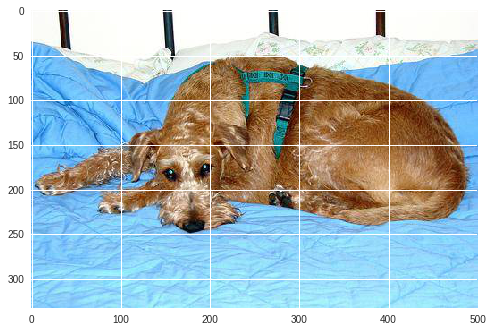

In [21]:
img=plt.imread(os.path.join(f'{PATH}train/{files[5]}'))
plt.imshow(img)

In [22]:
!mkdir /usr/local/lib/python3.6/dist-packages/fastai/weights/

mkdir: cannot create directory ‘/usr/local/lib/python3.6/dist-packages/fastai/weights/’: File exists


In [23]:
!wget -O /usr/local/lib/python3.6/dist-packages/fastai/weights/weights.tgz  http://files.fast.ai/models/weights.tgz
!tar xvf /usr/local/lib/python3.6/dist-packages/fastai/weights/weights.tgz -C /usr/local/lib/python3.6/dist-packages/fastai/


Redirecting output to ‘wget-log.1’.
^C
weights/
weights/wrn_50_2f.pth
^C


In [0]:
sz = 229
arch = resnext101_64
bs = 58

In [0]:
def get_my_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', bs=bs,
                                        val_idxs=val_idxs, suffix='.jpg',
                                        test_name='test',tfms=tfms)
    return data 

In [0]:
data_229 = get_my_data(sz, bs)

In [27]:
learn = ConvLearner.pretrained(arch, data_229, precompute=True)

100%|██████████| 179/179 [06:46<00:00,  1.93s/it]


In [53]:
learn.lr_find()

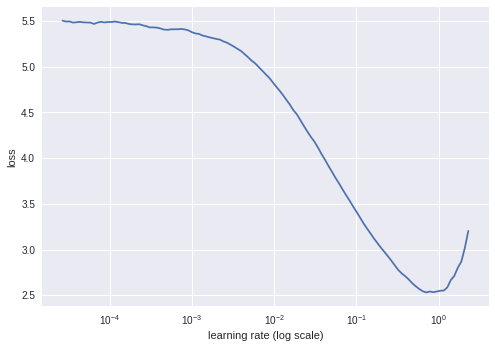

In [54]:
learn.sched.plot()

In [55]:
learn.fit(1e-1, 3)

epoch      trn_loss   val_loss   accuracy   
    0      0.683292   0.374524   0.888454  
    1      0.39383    0.344656   0.895793  
    2      0.275198   0.318947   0.90362   


[array([0.31895]), 0.903620362865015]

In [0]:
learn.precompute=False

In [59]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      4.818099   5.037654   0.008317  


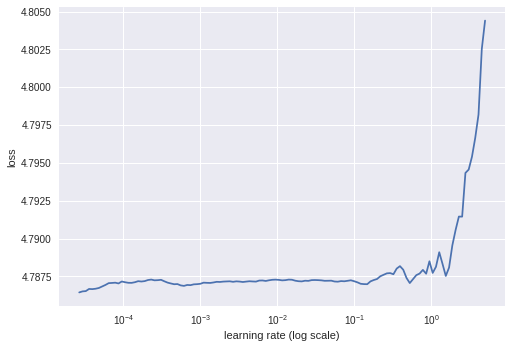

In [60]:
learn.sched.plot()

In [0]:
learn.unfreeze()

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [30]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.277594   0.621661   0.894814  
    1      0.644222   0.324389   0.914873  
    2      0.451175   0.304923   0.924168  
    3      0.398074   0.26235    0.920744  
    4      0.333021   0.242774   0.929061  
    5      0.288595   0.236272   0.929061  
    6      0.270871   0.237447   0.931507  



[array([0.23745]), 0.9315068514729666]

In [0]:
learn.set_data(get_my_data(299, bs)) 
learn.freeze()

In [35]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.215481   0.212482   0.931507  
    1      0.219906   0.212888   0.932975  
    2      0.189065   0.210959   0.931996  
    3      0.181834   0.211446   0.934442  
    4      0.171928   0.210634   0.932975  
    5      0.145631   0.207425   0.936888  
    6      0.14495    0.207412   0.936888  


[array([0.20741]), 0.9368884565195692]

In [38]:
log_preds, y = learn.TTA(is_test=True)

In [0]:
probs = np.mean(np.exp(log_preds),0)

In [0]:
df = pd.DataFrame(probs)
df.columns = data_229.classes

In [0]:
df.insert(0, 'id', [o[5:-4] for o in data_229.test_ds.fnames])

In [0]:
SUBM = f'{PATH}/subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [53]:
os.listdir('data/')

['models',
 'train',
 'labels.csv',
 'subm',
 'test',
 'tmp',
 'sample_submission.csv']

In [0]:
from google.colab import files
files.download('data/subm/subm.gz')